In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

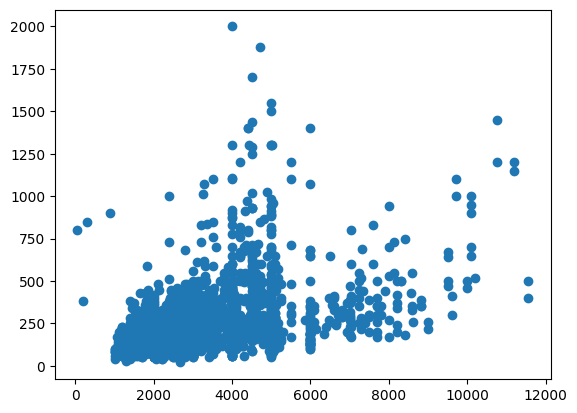

In [52]:
phones = pd.read_csv('./data.csv')
X = phones[["battery_capacity", "Price"]]
plt.scatter(X["battery_capacity"], X["Price"])
plt.show()

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

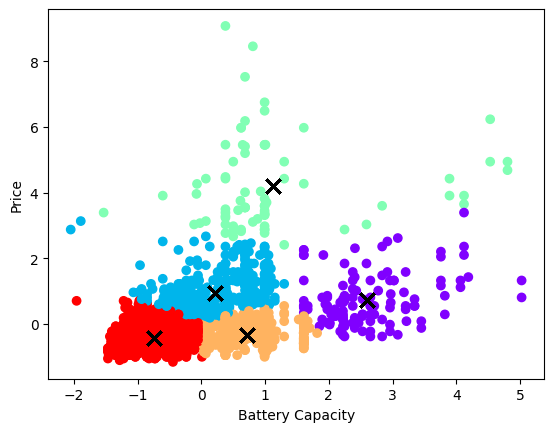

In [54]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[labels, 0], centroids[labels, 1], marker="x", color="black", s=100)
plt.xlabel("Battery Capacity")
plt.ylabel("Price")
plt.show()

In [55]:
wcss = []
number_clusters = np.arange(1, 11)
for index in number_clusters:
    kmeans = KMeans(n_clusters= index)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Clusters Sum of Squares')

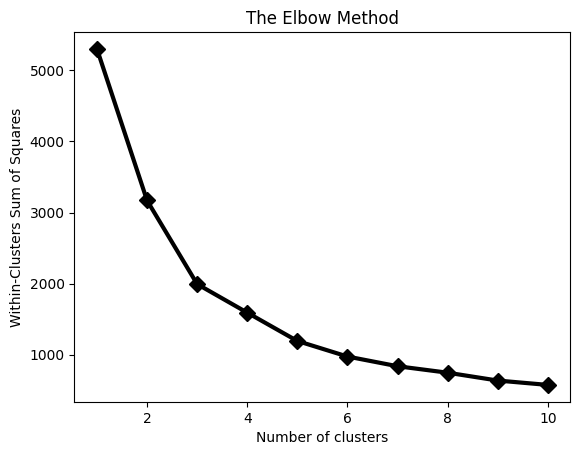

In [59]:
plt.plot(number_clusters, wcss, linewidth=3, color="black", marker="D", markersize=8)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Clusters Sum of Squares")

In [95]:
from sklearn.metrics import silhouette_score

number_clusters = np.arange(2, 12)
kmeans_per_k = [KMeans(n_clusters=k).fit(X_scaled) for k in number_clusters]
silhouette_scores = [silhouette_score(X_scaled, kmeans.labels_) for kmeans in kmeans_per_k]

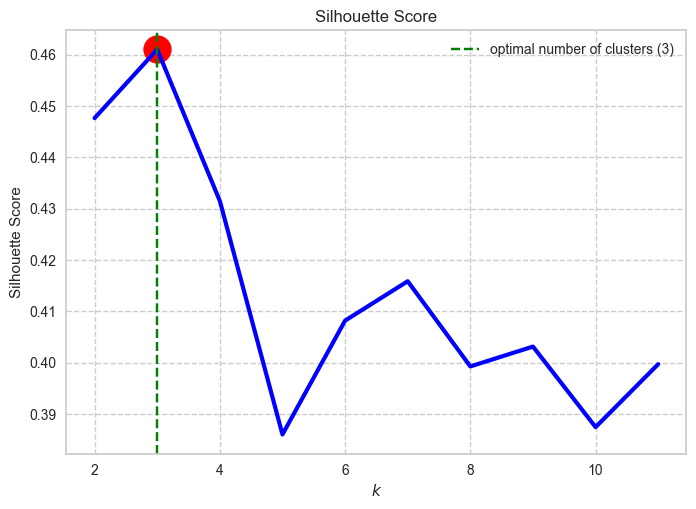

In [96]:
plt.plot(number_clusters, silhouette_scores, color="blue", linewidth=3, markersize=8)
plt.title("Silhouette Score")
plt.xlabel("$k$")
plt.ylabel("Silhouette Score")
plt.grid(which='major', color='#cccccc', linestyle='--')

k = np.argmax(silhouette_scores) + 2
plt.axvline(x=k, color="green", linestyle='--', label='optimal number of clusters ({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c="red", s=400)
plt.legend(shadow=True)
plt.show()

In [97]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors="k")
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=50,
                linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=70, 
                linewidths=3.5, color=cross_color, zorder=11, alpha=1)

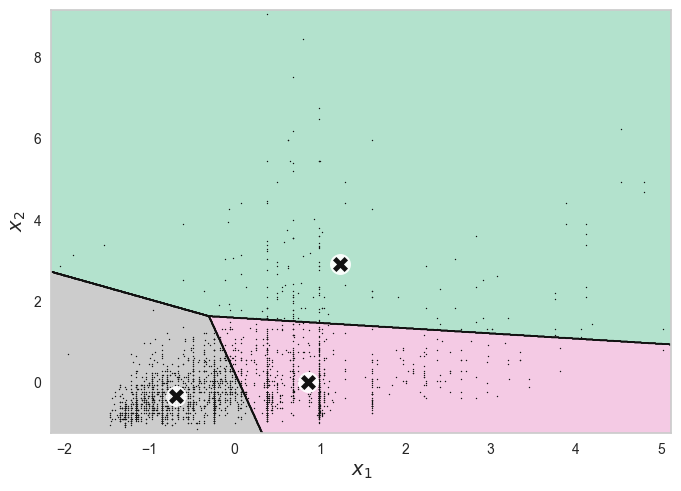

In [98]:
plot_decision_boundaries(kmeans_per_k[1], X_scaled)
plt.show()

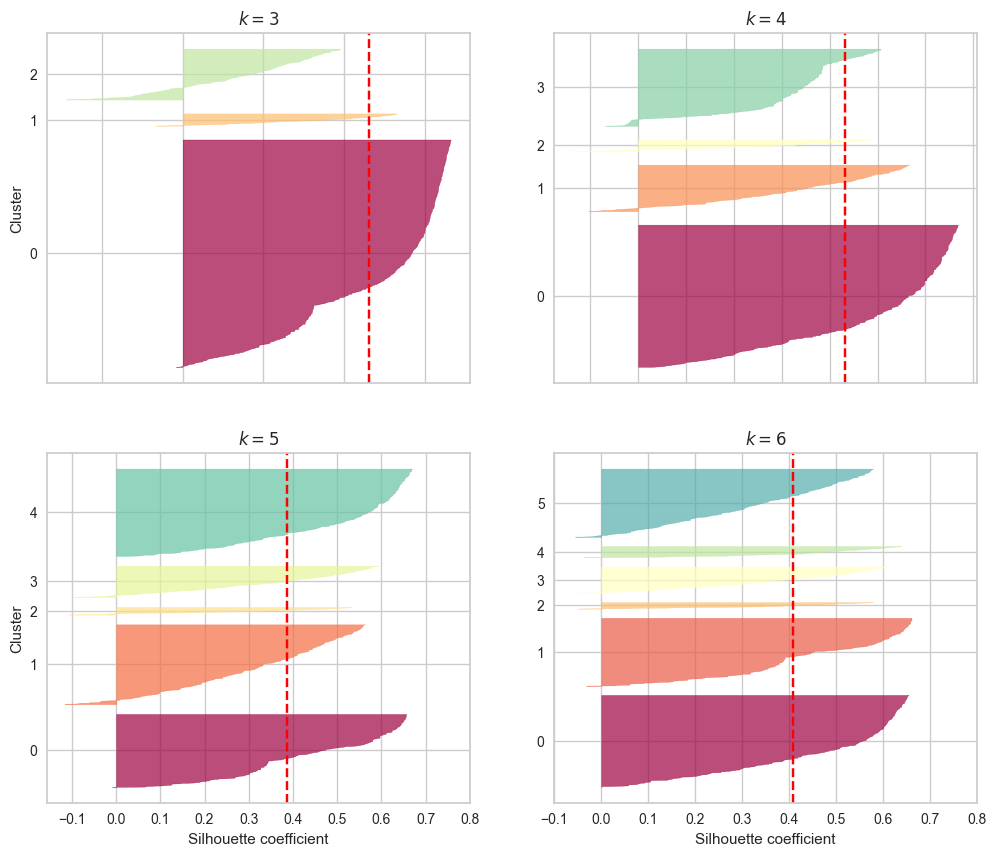

In [99]:
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12, 10))
 
for k in [3, 4, 5, 6]:
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_confficients = silhouette_samples(X_scaled, y_pred)
    
    padding = len(X_scaled) //30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_confficients[y_pred == i]
        coeffs.sort()
        
        color = plt.get_cmap('Spectral')(i / k)
        plt.fill_betweenx(np.arange(pos, pos+ len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
        plt.xlabel("Silhouette coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k - 2], color='red', linestyle='--')
    plt.title("$k={}$".format(k))

plt.show()
    

In [106]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(X_scaled)

DBSCAN()

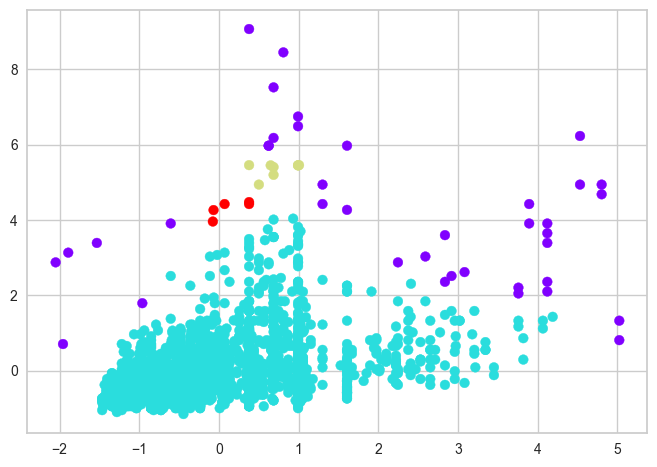

In [107]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, cmap='rainbow')
plt.show()

In [108]:
silhouette_score(X_scaled, dbscan.labels_)

0.6446380588815287

In [110]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [111]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [113]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))

combinations
    

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [114]:
def get_scores_and_labels(combinations, X):
    scores = []
    all_labels_list = []
    for i, (epsilon, min_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=epsilon, min_samples=min_samples)
        dbscan_cluster_model.fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
        
        if num_clusters < 2 or num_clusters > 50:
            scores.append(-10)
            all_labels_list.append('bad')
            continue
        
        scores.append(silhouette_score(X, labels))
        all_labels_list.append(labels)
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]
    return {
        'best_epsilon': best_parameters[0], 
        'best_min_samples': best_parameters[1], 
        'best_score': best_score, 
        'best_labels': best_labels
    }

best_dict = get_scores_and_labels(combinations, X_scaled)

In [115]:
best_dict

{'best_epsilon': 0.8585714285714285,
 'best_min_samples': 11,
 'best_score': 0.720328516679874,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

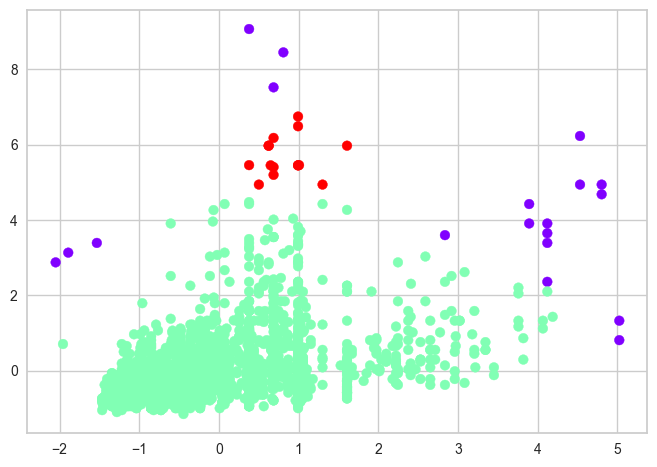

In [116]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],  c=best_dict['best_labels'], cmap='rainbow')